In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit

In [189]:
df = pd.read_csv("https://raw.githubusercontent.com/Ahmad20/Time-Series---LSTM/main/austin_weather.csv")

In [190]:
df.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,30.04,29.97,29.91,10,10,10,12,4,20,0,


In [191]:
df = df[['Date','TempAvgF']]

Text(0.5, 1.0, 'Suhu Rerata(F)')

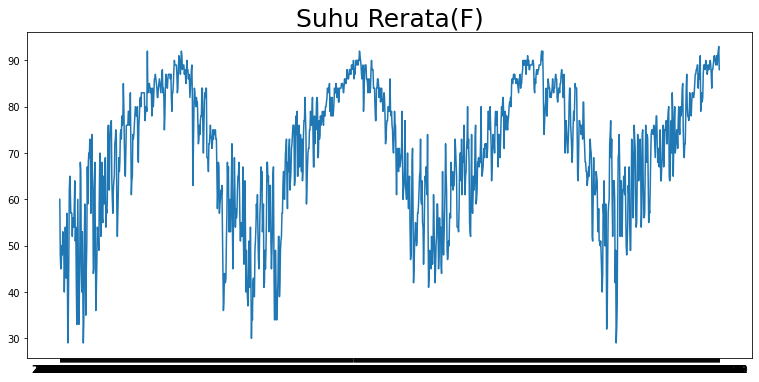

In [192]:
dates = df['Date'].values
temps = df['TempAvgF'].values

plt.figure(figsize=(13,6))
plt.plot(dates,temps)
plt.title("Suhu Rerata(F)", fontsize=25)

In [193]:
df.shape

(1319, 2)

Data Training 80% | Data Test 20%

In [194]:
train_set, test_set= np.split(df, [int(.80 *len(df))])

In [195]:
print(train_set.shape)
print(type(train_set))
train_set = train_set.to_numpy()
print(type(train_set))

(1055, 2)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [196]:
print(test_set.shape)
print(type(test_set))

(264, 2)
<class 'pandas.core.frame.DataFrame'>


In [197]:
df.dtypes

Date        object
TempAvgF     int64
dtype: object

Temperatur memiliki tipe data integer sehingga perlu di lakukan konversi menjadi tipe float64

In [198]:
new_temp=train_set[:,1].astype('float64')

In [199]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [200]:
train_set = windowed_dataset(new_temp, 30, 50, 200)
model = tf.keras.models.Sequential([
     tf.keras.layers.LSTM(60, return_sequences=True),
     tf.keras.layers.LSTM(60),
     tf.keras.layers.Dense(30, activation="relu"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(1),
    ])

In [201]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=.9)
model.compile(
    loss = tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"])
history = model.fit(train_set, epochs=100)

Epoch 1/100
21/21 [==============================] - 5s 42ms/step - loss: 70.3005 - mae: 70.8005
Epoch 2/100
21/21 [==============================] - 1s 41ms/step - loss: 69.9557 - mae: 70.4557
Epoch 3/100
21/21 [==============================] - 1s 45ms/step - loss: 69.6072 - mae: 70.1072
Epoch 4/100
21/21 [==============================] - 1s 41ms/step - loss: 69.2554 - mae: 69.7554
Epoch 5/100
21/21 [==============================] - 1s 42ms/step - loss: 68.8368 - mae: 69.3368
Epoch 6/100
21/21 [==============================] - 1s 40ms/step - loss: 68.3088 - mae: 68.8088
Epoch 7/100
21/21 [==============================] - 1s 39ms/step - loss: 67.6234 - mae: 68.1234
Epoch 8/100
21/21 [==============================] - 1s 41ms/step - loss: 66.7106 - mae: 67.2106
Epoch 9/100
21/21 [==============================] - 1s 41ms/step - loss: 65.4577 - mae: 65.9577
Epoch 10/100
21/21 [==============================] - 1s 41ms/step - loss: 63.6726 - mae: 64.1726
Epoch 11/100
21/21 [=========